In [1]:
%pylab inline
import pandas as pd
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = list(map(lambda x: json.loads(x), open("ex1.data").read().strip().split("\n")))

In [3]:
exp1 = pd.DataFrame(raw)
exp1["instance"] = exp1["instance"].apply(lambda x: x.split("/")[1].strip())
exp1["instance_size"] = exp1["instance"].apply(lambda x: x.split("_")[0])
exp1["score"] = exp1["score"].apply(lambda x: int(x))
#exp1 = exp1.set_index("instance")
exp1.head()

,algo,initial,instance,score,timeout,times,instance_size
0,ils,606197,50_20_03,594139,70,"[[0.14641, 603286], [0.321501, 598693], [0.367...",50
1,ils,675359,50_20_04,669420,70,"[[1.52274, 673871], [3.12878, 673712], [4.8855...",50
2,ils,658366,50_20_06,645158,70,"[[0.091411, 655477], [0.312319, 648338], [0.35...",50
3,ils,633371,50_20_02,627098,70,"[[0.181974, 630892], [0.376224, 629672], [0.56...",50
4,ils,609080,50_20_10,601898,70,"[[0.395709, 607270], [0.50609, 606770], [1.276...",50


In [4]:
best = pd.read_csv("instances/bestSolutions.txt")
best.columns = ["instance", "best_solution"]
best["instance"] = best["instance"].apply(lambda x: x.strip())
#best = best.set_index("instance")
best.head(10)

,instance,best_solution
0,100_20_01,1792110.0
1,100_20_02,1810660.0
2,100_20_03,1679880.0
3,100_20_04,1943480.0
4,100_20_05,1539090.0
5,100_20_06,1660530.0
6,100_20_07,1783580.0
7,100_20_08,1754470.0
8,100_20_09,1852180.0
9,100_20_10,1660070.0


In [5]:
e1 = pd.merge(exp1, best, on="instance", how="left")
e1.head(10)

,algo,initial,instance,score,timeout,times,instance_size,best_solution
0,ils,606197,50_20_03,594139,70,"[[0.14641, 603286], [0.321501, 598693], [0.367...",50,592745.0
1,ils,675359,50_20_04,669420,70,"[[1.52274, 673871], [3.12878, 673712], [4.8855...",50,666621.0
2,ils,658366,50_20_06,645158,70,"[[0.091411, 655477], [0.312319, 648338], [0.35...",50,643294.0
3,ils,633371,50_20_02,627098,70,"[[0.181974, 630892], [0.376224, 629672], [0.56...",50,622342.0
4,ils,609080,50_20_10,601898,70,"[[0.395709, 607270], [0.50609, 606770], [1.276...",50,600785.0
5,ils,615040,50_20_23,603081,70,"[[0.405156, 612154], [0.539394, 611214], [0.95...",50,602536.0
6,ils,580507,50_20_20,565562,70,"[[0.145562, 579552], [0.970769, 579544], [1.10...",50,565240.0
7,ils,673982,50_20_05,655529,70,"[[0.096258, 670074], [0.304163, 668790], [0.49...",50,653748.0
8,ils,607585,50_20_26,603470,70,"[[0.102728, 606617], [4.28372, 606552], [4.595...",50,600296.0
9,ils,583685,50_20_14,573747,70,"[[0.054394, 583268], [0.501383, 583042], [0.64...",50,572954.0


In [6]:
e1["diff"] = (e1["score"] - e1['best_solution']) / e1['best_solution']
e1.head()

,algo,initial,instance,score,timeout,times,instance_size,best_solution,diff
0,ils,606197,50_20_03,594139,70,"[[0.14641, 603286], [0.321501, 598693], [0.367...",50,592745.0,0.002352
1,ils,675359,50_20_04,669420,70,"[[1.52274, 673871], [3.12878, 673712], [4.8855...",50,666621.0,0.004199
2,ils,658366,50_20_06,645158,70,"[[0.091411, 655477], [0.312319, 648338], [0.35...",50,643294.0,0.002898
3,ils,633371,50_20_02,627098,70,"[[0.181974, 630892], [0.376224, 629672], [0.56...",50,622342.0,0.007642
4,ils,609080,50_20_10,601898,70,"[[0.395709, 607270], [0.50609, 606770], [1.276...",50,600785.0,0.001853


In [7]:
e1[e1['diff'] < 0].shape

(26, 9)

In [8]:
e1[e1['diff'] > 0.02].shape

(11, 9)

In [9]:
e1[e1['diff'] > 0.01].shape

(169, 9)

# Compute for each of the two SLS algorithms and each instance the average percentage deviation from the best known solutions.

In [10]:
e1.groupby(["algo", "instance"]).mean()[["diff"]]

diff
algo    instance           
genetic 100_20_01  0.011222
        100_20_02  0.013086
        100_20_03  0.012037
        100_20_04  0.015829
        100_20_05  0.015102
        100_20_06  0.015239
        100_20_07  0.007012
        100_20_08  0.016875
        100_20_09  0.008357
        100_20_10  0.015352
        100_20_11  0.011619
        100_20_12  0.008405
        100_20_13  0.013429
        100_20_14  0.013778
        100_20_15  0.013254
        100_20_16  0.016050
        100_20_17  0.013752
        100_20_18  0.009085
        100_20_19  0.017614
        100_20_20  0.009581
        100_20_21  0.014523
        100_20_22  0.012543
        100_20_23  0.020135
        100_20_24  0.011917
        100_20_25  0.011632
        100_20_26  0.014281
        100_20_27  0.016956
        100_20_28  0.014868
        100_20_29  0.016380
        100_20_30  0.015408
...                     ...
ils     50_20_01   0.002921
        50_20_02   0.002746
        50_20_03   0.001063
        50_20_04   0.003524
        50_20_05   0.002415
        50_20_06   0.000513
        50_20_07   0.000766
        50_20_08   0.001110
        50_20_09  -0.000650
        50_20_10   0.001714
        50_20_11   0.002200
        50_20_12   0.001468
        50_20_13   0.002723
        50_20_14   0.003781
        50_20_15   0.003113
        50_20_16   0.001119
        50_20_17   0.001342
        50_20_18   0.003437
        50_20_19   0.001237
        50_20_20   0.002840
        50_20_21   0.003126
        50_20_22   0.001409
        50_20_23   0.002277
        50_20_24   0.003062
        50_20_25   0.003134
        50_20_26   0.003455
        50_20_27   0.001005
        50_20_28   0.003048
        50_20_29   0.000966
        50_20_30   0.002012

[120 rows x 1 columns]

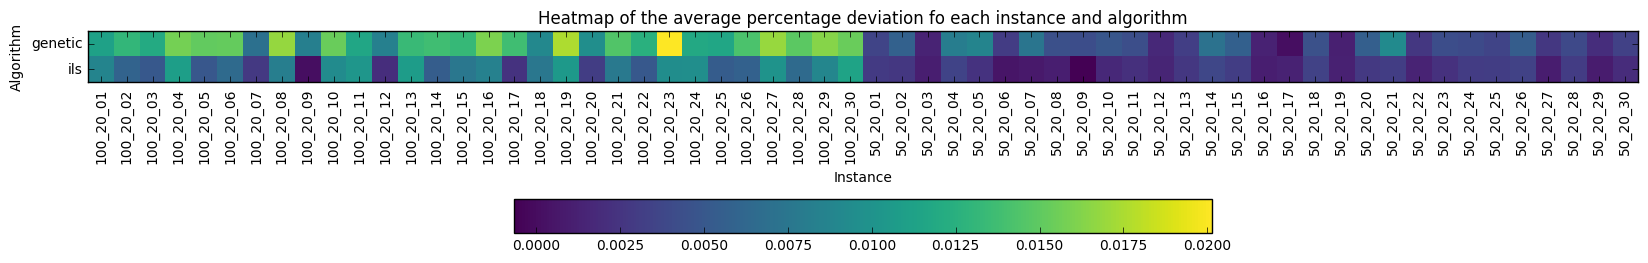

In [29]:
fig = plt.figure(figsize=(20,3))
heatmap = plt.imshow(
    e1.groupby(["algo", "instance"]).mean()[["diff"]].unstack().values,
    interpolation='nearest',
    cmap="viridis",
)
plt.xticks(range(60), e1.groupby(["algo", "instance"]).mean().reset_index().instance.values, rotation=90)
plt.yticks(range(2), e1.groupby(["algo", "instance"]).mean().reset_index().algo.unique())
plt.xlabel("Instance")
plt.ylabel("Algorithm")
plt.title("Heatmap of the average percentage deviation fo each instance and algorithm")

plt.colorbar(heatmap, orientation="horizontal", pad=0.5);


# For each instance size, also compute the average percentage deviation across all instances.

In [12]:
e1.groupby(["algo", "instance_size"]).mean()[["diff"]]

diff
algo    instance_size          
genetic 100            0.013511
        50             0.004279
ils     100            0.007042
        50             0.002096

# Produce correlation plots of the average relative percentage deviation for the two SLS algorithms (see lectures), separating between the instance sizes (either two separate plots or clearly marking differences in one plot).

In [13]:
df = e1.groupby(["algo", "instance"]).mean()[["diff"]].reset_index()
corr = pd.merge(
    df[df.algo == "ils"][["instance", "diff"]],
    df[df.algo == "genetic"][["instance", "diff"]],
    on="instance",
    suffixes=("_ils", "_genetic")
)
corr["instance_size"] = corr["instance"].str.split("_").str[0].astype(int)

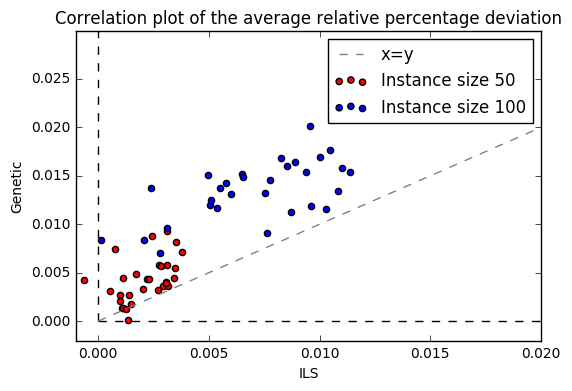

In [30]:
plt.plot((0, 1), (0, 0), '--', color="black")
plt.plot((0, 0), (0, 1), '--', color="black")
plt.plot((0, 1), (0,1), '--', color="grey", label="x=y")
plt.scatter(corr[corr.instance_size == 50].diff_ils, corr[corr.instance_size == 50].diff_genetic, c="red", label="Instance size 50")
plt.scatter(corr[corr.instance_size == 100].diff_ils, corr[corr.instance_size == 100].diff_genetic, c="blue", label="Instance size 100")
plt.xlabel("ILS")
plt.ylabel("Genetic")
plt.legend()
plt.xlim(-0.001,0.02)
plt.ylim(-0.002,0.03);
plt.title("Correlation plot of the average relative percentage deviation")

In [15]:
corr.sample()

,instance,diff_ils,diff_genetic,instance_size
37,50_20_08,0.00111,0.004429,50


# Determine, using statistical tests (in this case, the Wilcoxon test), whether there is a statistically significant difference between the mean relative percentage deviations reached by the two algorithms for each instance size

In [16]:
scipy.stats.wilcoxon(corr[corr.instance_size == 50].diff_ils, corr[corr.instance_size == 50].diff_genetic)

WilcoxonResult(statistic=13.0, pvalue=6.3391355731224642e-06)

In [17]:
scipy.stats.wilcoxon(corr[corr.instance_size == 100].diff_ils, corr[corr.instance_size == 100].diff_genetic)

WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)

# Measure, for each of the two implemented SLS algorithms on the first 5 instances of size 50 jobs, qualified
run-time distributions to reach sufficiently high quality solutions (e.g. the best-known solutions available or
some solution value close to the best-known one such as {0.1, 0.5, 1, 2}% above the best-known solutions).
Measure the run-time distributions across 25 repetitions using a cut-off time of 10 times the termination
criterion above.

In [18]:
raw2 = list(map(lambda x: json.loads(x), open("ex2.data").read().strip().split("\n")))

exp2 = pd.DataFrame(raw2)
exp2["instance"] = exp2["instance"].apply(lambda x: x.split("/")[1].strip())
exp2["instance_size"] = exp2["instance"].apply(lambda x: x.split("_")[0])
exp2["score"] = exp2["score"].apply(lambda x: int(x))
exp2.head()

,algo,initial,instance,score,timeout,times,instance_size
0,ils,607667,50_20_01,595577,700,"[[0.256042, 607666], [0.956114, 603962], [3.55...",50
1,ils,633371,50_20_02,622444,700,"[[0.156835, 623052], [51.3859, 622902], [51.54...",50
2,ils,606197,50_20_03,592125,700,"[[0.301871, 603104], [0.7346, 602951], [0.9571...",50
3,ils,675359,50_20_04,667122,700,"[[0.90578, 674940], [0.954233, 674796], [1.461...",50
4,ils,673982,50_20_05,654511,700,"[[0.172859, 673573], [1.44066, 672760], [1.724...",50


In [19]:
e2 = pd.merge(exp2, best, on="instance", how="left")
e2.head(10)

,algo,initial,instance,score,timeout,times,instance_size,best_solution
0,ils,607667,50_20_01,595577,700,"[[0.256042, 607666], [0.956114, 603962], [3.55...",50,595260.0
1,ils,633371,50_20_02,622444,700,"[[0.156835, 623052], [51.3859, 622902], [51.54...",50,622342.0
2,ils,606197,50_20_03,592125,700,"[[0.301871, 603104], [0.7346, 602951], [0.9571...",50,592745.0
3,ils,675359,50_20_04,667122,700,"[[0.90578, 674940], [0.954233, 674796], [1.461...",50,666621.0
4,ils,673982,50_20_05,654511,700,"[[0.172859, 673573], [1.44066, 672760], [1.724...",50,653748.0
5,ils,607667,50_20_01,595577,700,"[[0.254951, 607666], [0.927411, 603962], [3.69...",50,595260.0
6,ils,633371,50_20_02,622444,700,"[[0.155999, 623052], [50.95, 622902], [51.0953...",50,622342.0
7,ils,606197,50_20_03,592125,700,"[[0.270539, 603104], [0.700684, 602951], [0.92...",50,592745.0
8,ils,675359,50_20_04,667122,700,"[[0.857115, 674940], [0.904307, 674796], [1.40...",50,666621.0
9,ils,673982,50_20_05,654511,700,"[[0.174626, 673573], [1.39998, 672760], [1.695...",50,653748.0


In [20]:
def extract_time(cutoff):
    def inner(row):
        enough_score = (cutoff + 1) * row.best_solution
        
        data = row.times
        for item in data:
            time = item[0]
            score = int(item[1])
            if score < enough_score:
                return time
    return inner

In [21]:
e2["below_2"] = e2.apply(extract_time(0.02), axis=1)
e2["below_1"] = e2.apply(extract_time(0.01), axis=1)
e2["below_05"] = e2.apply(extract_time(0.005), axis=1)
e2["below_01"] = e2.apply(extract_time(0.001), axis=1)
e2["diff"] = (e2["score"] - e2['best_solution']) / e2['best_solution']

In [22]:
e2.head()

,algo,initial,instance,score,timeout,times,instance_size,best_solution,below_2,below_1,below_05,below_01,diff
0,ils,607667,50_20_01,595577,700,"[[0.256042, 607666], [0.956114, 603962], [3.55...",50,595260.0,0.956114,17.514800,47.095600,451.2250,0.000533
1,ils,633371,50_20_02,622444,700,"[[0.156835, 623052], [51.3859, 622902], [51.54...",50,622342.0,0.156835,0.156835,0.156835,51.3859,0.000164
2,ils,606197,50_20_03,592125,700,"[[0.301871, 603104], [0.7346, 602951], [0.9571...",50,592745.0,0.301871,2.264050,10.453800,64.9041,-0.001046
3,ils,675359,50_20_04,667122,700,"[[0.90578, 674940], [0.954233, 674796], [1.461...",50,666621.0,0.905780,6.598680,34.466700,564.2470,0.000752
4,ils,673982,50_20_05,654511,700,"[[0.172859, 673573], [1.44066, 672760], [1.724...",50,653748.0,3.561460,3.705700,8.576760,NaN,0.001167


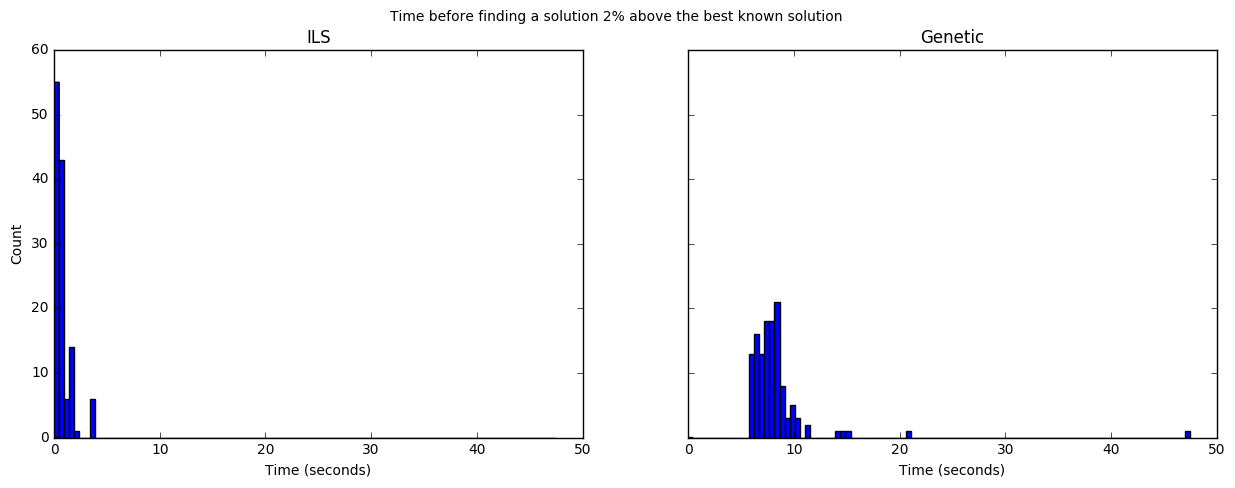

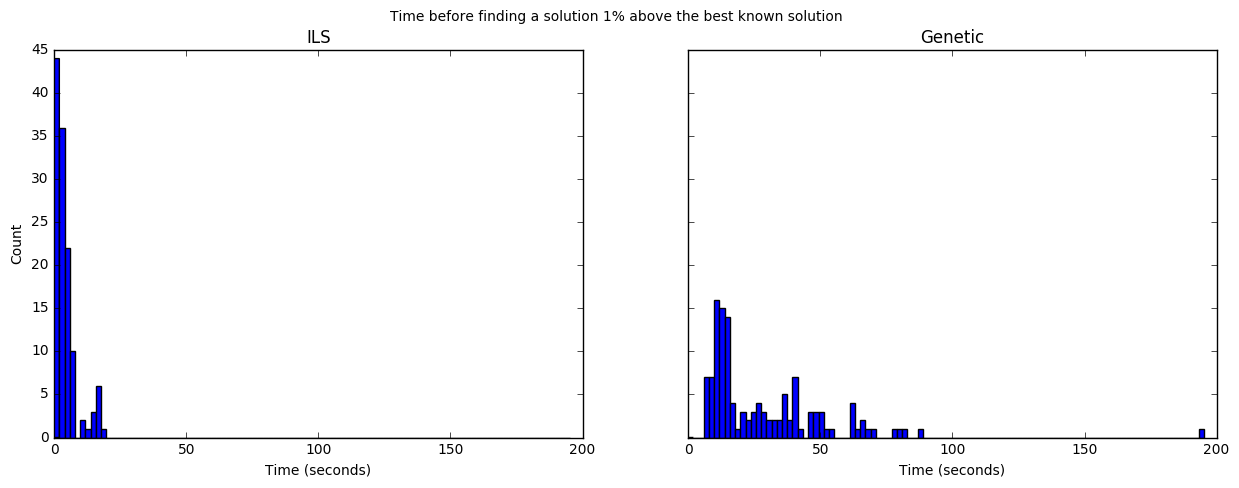

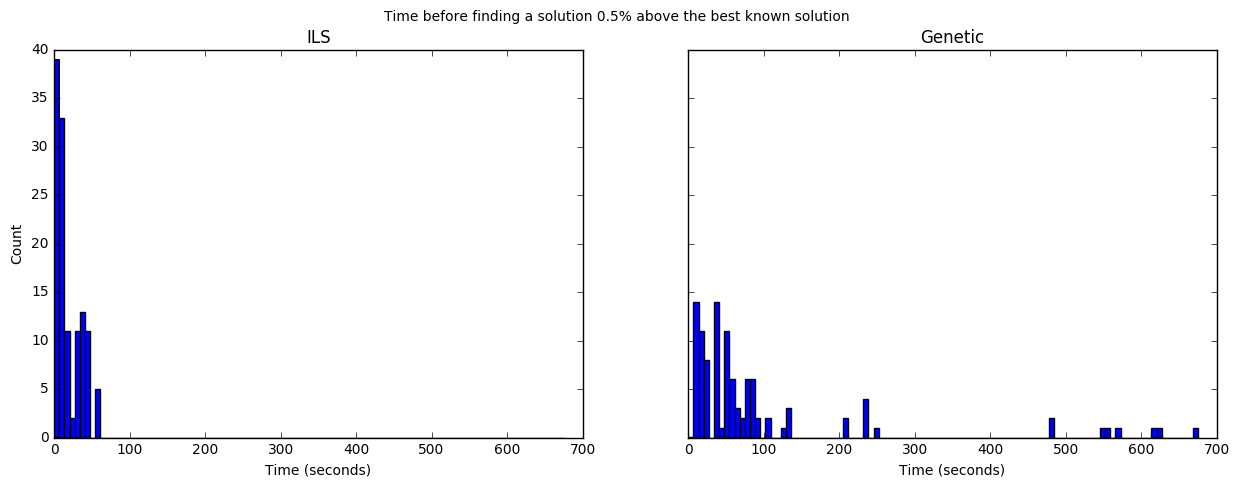

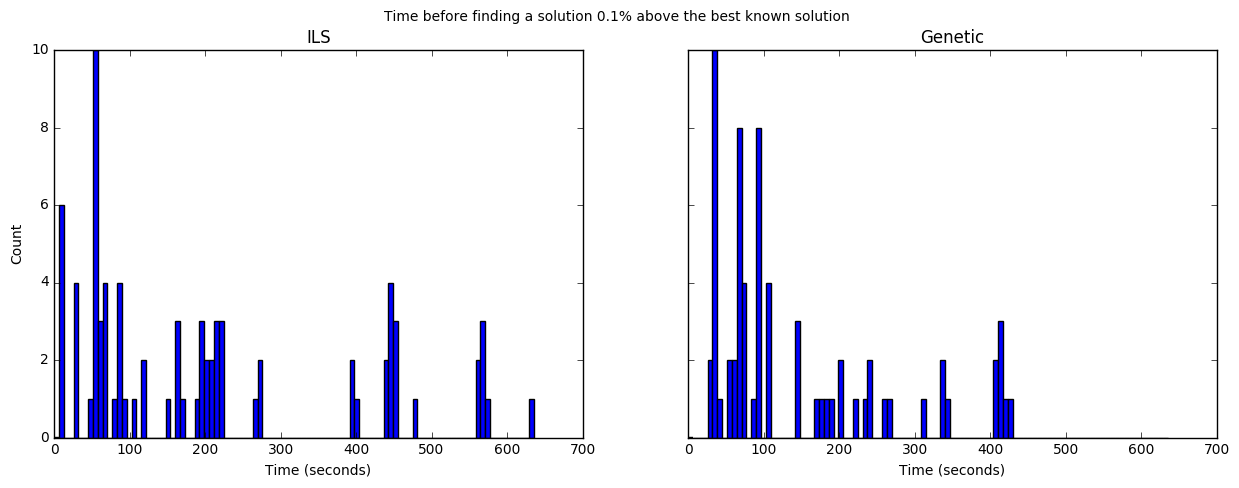

In [40]:
for col, x in zip(
        ["below_2", "below_1", "below_05", "below_01"],
        ["2%", "1%", "0.5%", "0.1%"]
    ):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))
    f.suptitle("Time before finding a solution %s above the best known solution" % x)
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Count')
    ils = e2[e2.algo == 'ils'][col]
    genetic = e2[e2.algo == 'genetic'][col]
    m = np.max([ils.max(), genetic.max()])
    ax1.hist(ils.dropna(), bins=np.linspace(0, m, num=100))
    ax1.set_title("ILS")
    ax2.hist(genetic.dropna(), bins=np.linspace(0, m, num=100))
    ax2.set_title("Genetic")
    ax2.set_xlabel('Time (seconds)')
    plt.show()

# Present the results as in the previous implementation exercise using tables and statistical tests.

In [42]:
for col, x in zip(
        ["below_2", "below_1", "below_05", "below_01"],
        ["2%", "1%", "0.5%", "0.1%"]
    ):
    
    ils = e2[e2.algo == 'ils'][col].dropna()
    genetic = e2[e2.algo == 'genetic'][col].dropna()
    print(ils.index.size, genetic.index.size)

125 125
125 125
125 105
79 68


In [46]:
for col, x in zip(
        ["below_2", "below_1", "below_05", "below_01"],
        ["2%", "1%", "0.5%", "0.1%"]
    ):
    
    ils = e2[e2.algo == 'ils'][col]
    genetic = e2[e2.algo == 'genetic'][col]
    print(scipy.stats.wilcoxon(
            ils,
            genetic
    ))

WilcoxonResult(statistic=0.0, pvalue=2.9643799464905646e-22)
WilcoxonResult(statistic=35.0, pvalue=6.8781487523225328e-22)
WilcoxonResult(statistic=337.0, pvalue=7.2243460833710146e-19)
WilcoxonResult(statistic=543.0, pvalue=6.0723338857135366e-17)


/home/nikita/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/nikita/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)
